In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("lung_survival.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,2926.0,2,74,1,1.0,90.0,100.0,1175.0,10.0
1,2,3.0,3144.0,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,3143.0,1,56,1,0.0,90.0,90.0,929.0,15.0
3,4,5.0,2689.0,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,3012.0,2,60,1,0.0,100.0,90.0,929.0,0.0


In [12]:
print("\nVeri setinin boyutu:", data.shape)
print("\nVeri setinin sütun bilgileri:\n", data.info())
print("\nEksik değerlerin sayısı:\n", data.isnull().sum())
print("\nTemel istatistiksel özet:\n", data.describe())


Veri setinin boyutu: (228, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        228 non-null    float64
 2   time        228 non-null    float64
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     223 non-null    float64
 7   ph.karno    228 non-null    float64
 8   pat.karno   228 non-null    float64
 9   meal.cal    228 non-null    float64
 10  wt.loss     222 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 19.7 KB

Veri setinin sütun bilgileri:
 None

Eksik değerlerin sayısı:
 Unnamed: 0    0
inst          0
time          0
status        0
age           0
sex           0
ph.ecog       5
ph.karno      0
pat.karno     0
meal.cal      0
wt.loss       6
dtype: int64

Temel istatistiksel özet:

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['time'])
y = data['time']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer


categorical_features = ['status', 'sex']
ordinal_features = ['ph.ecog']
continuous_features = ['age', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

continuous_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [15]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('cont', continuous_transformer, continuous_features)
    ])

In [16]:
from sklearn.linear_model import LinearRegression


model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

R^2 Score: 0.9181414249171581


In [18]:
feature_names = (
    model_pipeline.named_steps['preprocessor']
    .transformers_[0][1].named_steps['onehot']
    .get_feature_names_out(categorical_features).tolist() +
    ordinal_features +
    continuous_features
)
coefficients = model_pipeline.named_steps['regressor'].coef_

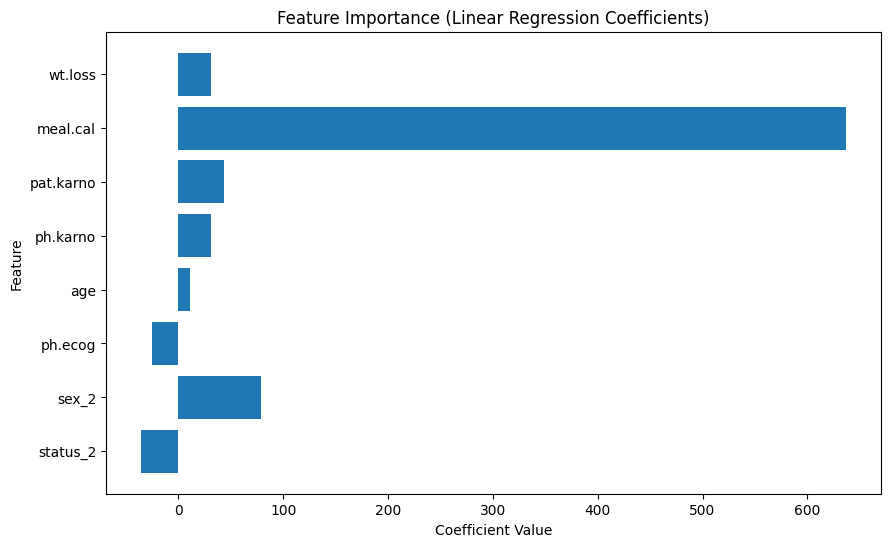

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()